In [32]:
!pip install pandas numpy matplotlib seaborn scikit-learn wordcloud

#### All necessary Libraries are Added Below 

In [4]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LinearRegression
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score


# Load The Dataset

In [53]:
df = pd.read_csv("car_purchasing.csv", encoding='ISO-8859-1')

In [54]:
# Read the top first 5 rows of dataset

df.head()

,customer name,customer e-mail,country,gender,age,annual Salary,credit card debt,net worth,car purchase amount
0,Martina Avila,cubilia.Curae.Phasellus@quisaccumsanconvallis.edu,Bulgaria,0,41.851720,62812.09301,11609.380910,238961.2505,35321.45877
1,Harlan Barnes,eu.dolor@diam.co.uk,Belize,0,40.870623,66646.89292,9572.957136,530973.9078,45115.52566
2,Naomi Rodriquez,vulputate.mauris.sagittis@ametconsectetueradip...,Algeria,1,43.152897,53798.55112,11160.355060,638467.1773,42925.70921
3,Jade Cunningham,malesuada@dignissim.com,Cook Islands,1,58.271369,79370.03798,14426.164850,548599.0524,67422.36313
4,Cedric Leach,felis.ullamcorper.viverra@egetmollislectus.net,Brazil,1,57.313749,59729.15130,5358.712177,560304.0671,55915.46248


In [56]:
#  Read The Last 5 Rows of Dataset

df.tail()

,customer name,customer e-mail,country,gender,age,annual Salary,credit card debt,net worth,car purchase amount
495,Walter,ligula@Cumsociis.ca,Nepal,0,41.462515,71942.40291,6995.902524,541670.1016,48901.44342
496,Vanna,Cum.sociis.natoque@Sedmolestie.edu,Zimbabwe,1,37.642000,56039.49793,12301.456790,360419.0988,31491.41457
497,Pearl,penatibus.et@massanonante.com,Philippines,1,53.943497,68888.77805,10611.606860,764531.3203,64147.28888
498,Nell,Quisque.varius@arcuVivamussit.net,Botswana,1,59.160509,49811.99062,14013.034510,337826.6382,45442.15353
499,Marla,Camaron.marla@hotmail.com,marlal,1,46.731152,61370.67766,9391.341628,462946.4924,45107.22566


## Data Overview

In [57]:
# Shape of Dataset

df.shape

(500, 9)

In [14]:
# Data Types 
df.dtypes

customer name           object
customer e-mail         object
country                 object
gender                   int64
age                    float64
annual Salary          float64
credit card debt       float64
net worth              float64
car purchase amount    float64
dtype: object

In [17]:
#  Find The Missing Values 
df.isnull().sum()

customer name          0
customer e-mail        0
country                0
gender                 0
age                    0
annual Salary          0
credit card debt       0
net worth              0
car purchase amount    0
dtype: int64

In [18]:
df.describe()

,gender,age,annual Salary,credit card debt,net worth,car purchase amount
count,500.000000,500.000000,500.000000,500.000000,500.000000,500.000000
mean,0.506000,46.241674,62127.239608,9607.645049,431475.713625,44209.799218
std,0.500465,7.978862,11703.378228,3489.187973,173536.756340,10773.178744
min,0.000000,20.000000,20000.000000,100.000000,20000.000000,9000.000000
25%,0.000000,40.949969,54391.977195,7397.515792,299824.195900,37629.896040
50%,1.000000,46.049901,62915.497035,9655.035568,426750.120650,43997.783390
75%,1.000000,51.612263,70117.862005,11798.867487,557324.478725,51254.709517
max,1.000000,70.000000,100000.000000,20000.000000,1000000.000000,80000.000000


## Some Visualisations

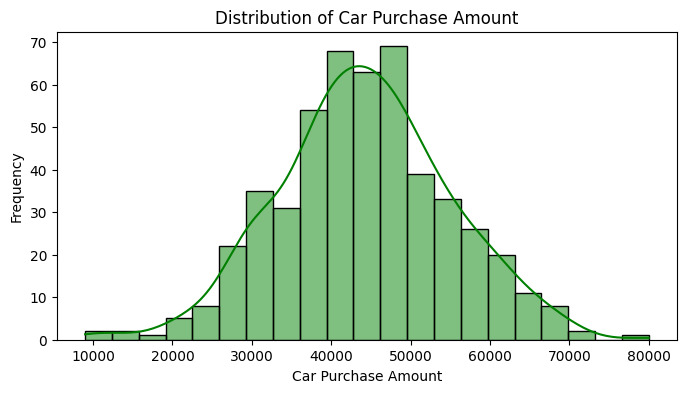

In [58]:
# Explore Target Distrbutions(Car Purchase amount)

plt.figure(figsize=(8,4))
sns.histplot(df['car purchase amount'],kde=True, color='green')   # kde show the that Green line 
plt.title("Distribution of Car Purchase Amount")
plt.xlabel("Car Purchase Amount")
plt.ylabel("Frequency")
plt.show()

From Above visualisation, we can see that Frequency count for the Car Purchase Amount between 40000 and 50000 have the highest frequency Approximately 70

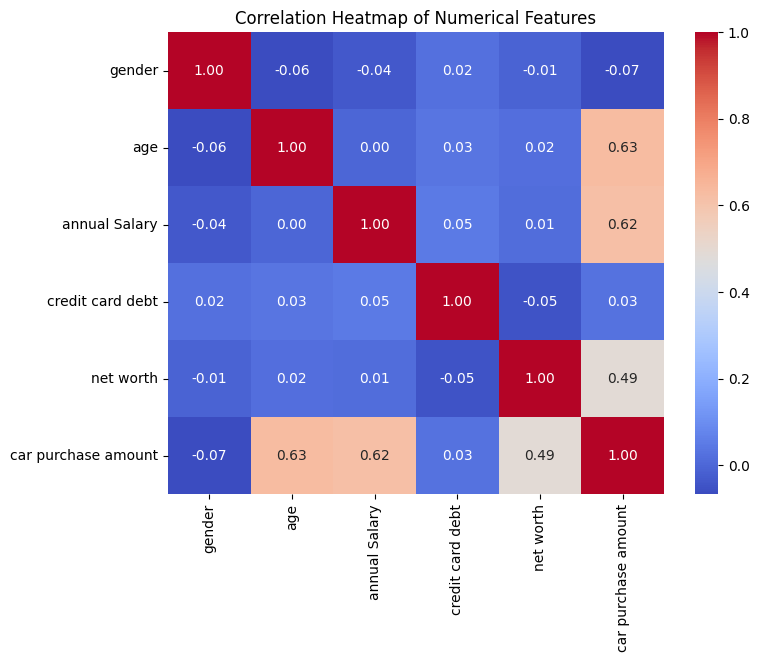

In [25]:
#  Correlation Analysis
numeric_df = df.select_dtypes(include=['number'])

plt.figure(figsize=(8, 6))
sns.heatmap(numeric_df.corr(), annot=True, cmap='coolwarm', fmt=".2f")
plt.title("Correlation Heatmap of Numerical Features")
plt.show()

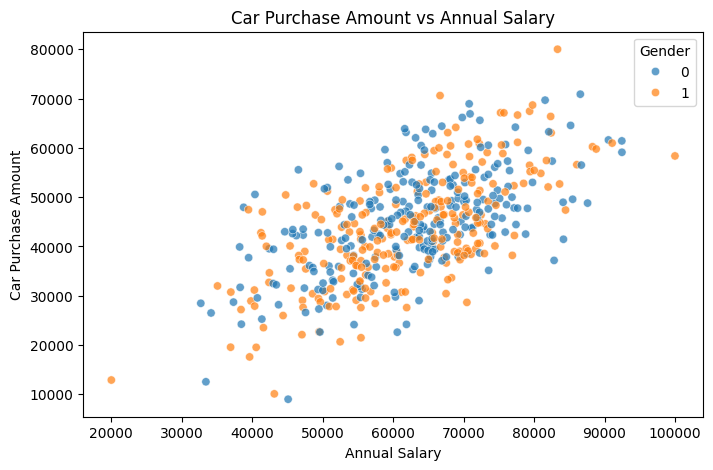

In [29]:
# Car Purchase Amount vs Annual Salary

plt.figure(figsize=(8, 5))
sns.scatterplot(x=df['annual Salary'], y=df['car purchase amount'], hue=df['gender'], alpha=0.7)
plt.title("Car Purchase Amount vs Annual Salary")
plt.xlabel("Annual Salary")
plt.ylabel("Car Purchase Amount")
plt.legend(title="Gender")
plt.show()

From Above, we understand that the customer with Annual Salary around (20000 and 30000) are in very less in number to purchase the car of amount between (10000 - 20000) so here they act as Outliers.

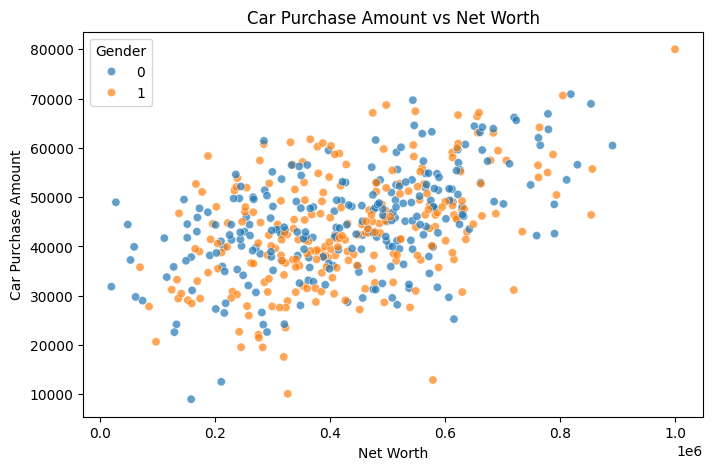

In [ ]:
#  Car Purchase Amount vs Net Worth

plt.figure(figsize=(8, 5))
sns.scatterplot(x=df['net worth'], y=df['car purchase amount'], hue=df['gender'], alpha=0.7)
plt.title("Car Purchase Amount vs Net Worth")
plt.xlabel("Net Worth")
plt.ylabel("Car Purchase Amount")
plt.legend(title="Gender")
plt.show()


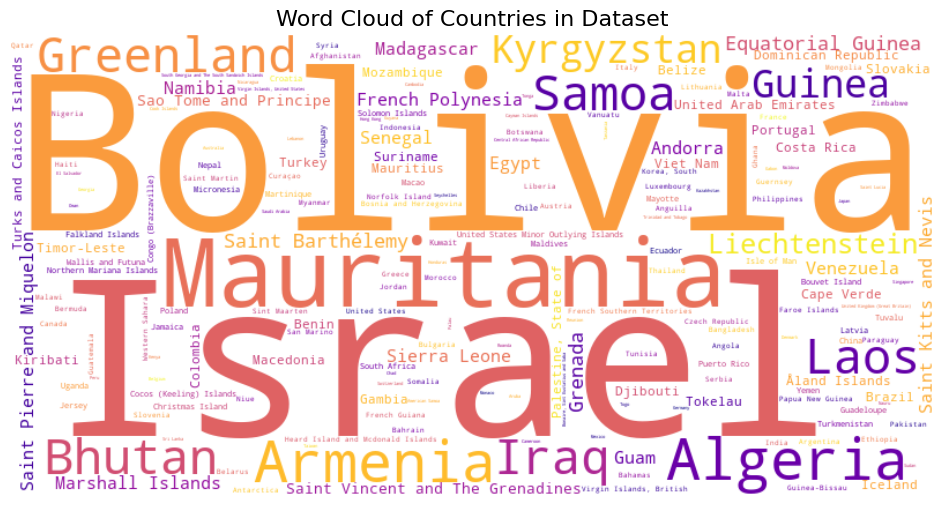

In [35]:
from wordcloud import WordCloud
from collections import Counter


country_freq = Counter(df['country'])

wordcloud = WordCloud(width=800, height=400, background_color='white', colormap='plasma').generate_from_frequencies(country_freq)

plt.figure(figsize=(12, 6))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis('off')
plt.title("Word Cloud of Countries in Dataset", fontsize=16)
plt.show()

The Country with Big Names in wordcloud have the highest number of Freqeuncy of Buying the Cars (Ex. Bolivia, Israel)

## Outliers Detections

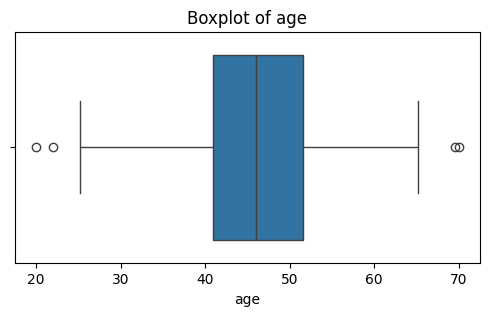

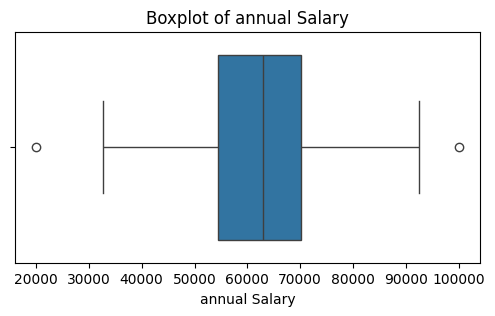

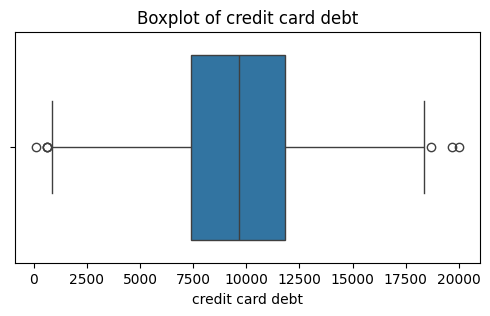

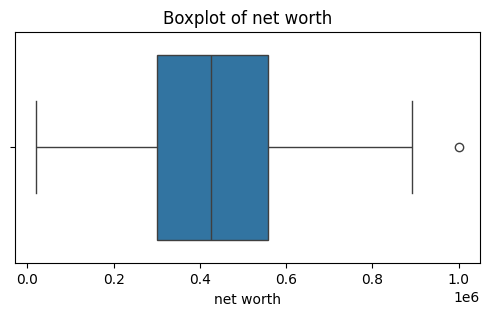

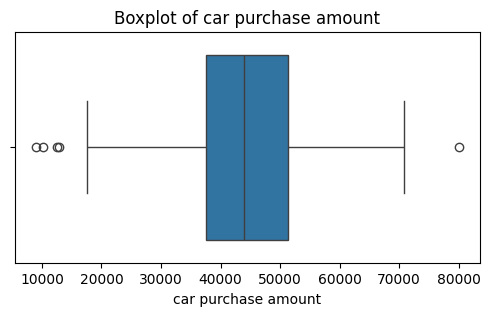

In [36]:
numerical_cols = ['age', 'annual Salary', 'credit card debt', 'net worth', 'car purchase amount']
for col in numerical_cols:
    plt.figure(figsize=(6, 3))
    sns.boxplot(x=df[col])
    plt.title(f"Boxplot of {col}")
    plt.show()

In [59]:
# Removing outliers using IQR

def remove_outliers(df, column):
    Q1 = df[column].quantile(0.25)
    Q3 = df[column].quantile(0.75)
    IQR = Q3 - Q1
    return df[(df[column] >= Q1 - 1.5*IQR) & (df[column] <= Q3 + 1.5*IQR)]

for col in ['annual Salary', 'credit card debt', 'net worth']:
    df = remove_outliers(df, col)


In [60]:
# For 'country', apply one-hot encoding

df = pd.get_dummies(df, columns=['country'], drop_first=True)

In [42]:
#  Feature Scaling


X = df.drop('car purchase amount', axis=1)
y = df['car purchase amount']

X = X.select_dtypes(include=['number'])

scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

In [43]:
# Train - test Split

X_train, X_test, y_train, y_test = train_test_split(X_scaled, y, test_size=0.2, random_state=42)


In [61]:
#  Model Training:- Linear Regression

lr = LinearRegression()
lr.fit(X_train, y_train)
y_pred_lr = lr.predict(X_test)

print("R^2 Score:", r2_score(y_test, y_pred_lr))
print("MAE:", mean_absolute_error(y_test, y_pred_lr))
print("RMSE:", np.sqrt(mean_squared_error(y_test, y_pred_lr)))


R^2 Score: 0.9999999735599707
MAE: 1.1233697675184626
RMSE: 1.4205037421655518


In [63]:
# Model Training:-  Random Forest

rf = RandomForestRegressor(random_state=42)
rf.fit(X_train, y_train)
y_pred_rf = rf.predict(X_test)

print("R^2 Score:", r2_score(y_test, y_pred_rf))
print("MAE:", mean_absolute_error(y_test, y_pred_rf))
print("RMSE:", np.sqrt(mean_squared_error(y_test, y_pred_rf)))


R^2 Score: 0.9595516145363783
MAE: 1292.2328157051022
RMSE: 1756.9605581843384


So we say that R^2 Score for Linear Regression is more that Random Forest 
And The MAE and RMSE are less for Linear regression that random Forest

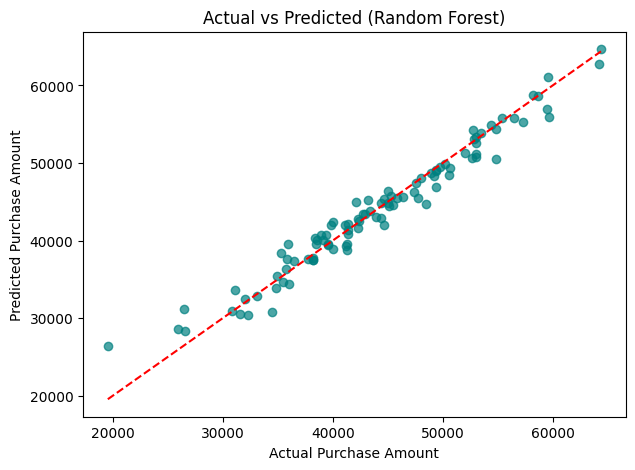

In [49]:
#  Plot: - Actual vs Predicted (Random Forest)

plt.figure(figsize=(7, 5))
plt.scatter(y_test, y_pred_rf, alpha=0.7, color='teal')
plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], 'r--')
plt.xlabel("Actual Purchase Amount")
plt.ylabel("Predicted Purchase Amount")
plt.title("Actual vs Predicted (Random Forest)")
plt.show()


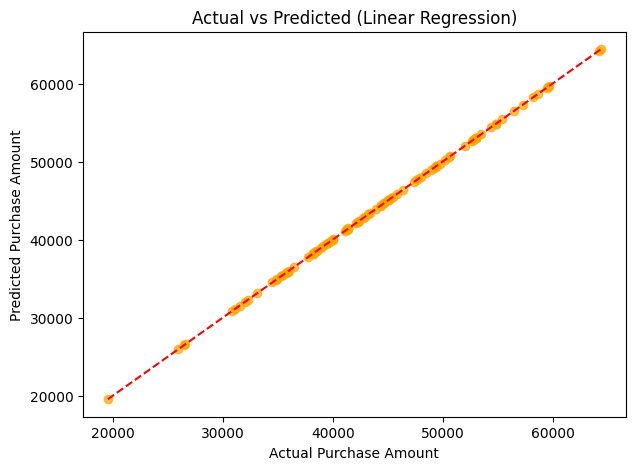

In [50]:
#  Plot:-  Actual vs Predicted (Linear Regression)
plt.figure(figsize=(7, 5))
plt.scatter(y_test, y_pred_lr, alpha=0.7, color='orange')
plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], 'r--')
plt.xlabel("Actual Purchase Amount")
plt.ylabel("Predicted Purchase Amount")
plt.title("Actual vs Predicted (Linear Regression)")
plt.show()


### Conclusion

• We built a machine learning model to forecast car purchase amounts using factors like salary, debt, net worth, age, etc.

• Outliers were handled using IQR; 'country' was one-hot encoded for segmentation.

• Feature scaling was applied to standardize inputs.

• Linear Regression performed better than random Forest with higher R² and lower RMSE.

• The model can help businesses forecast potential customer spending and tailor their marketing strategies accordingly.